# S2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db1_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230914/S2/30m-rain/Rx_OBU_CKCOX23040001_20230914-12-26-31_20230914-12-54-14_1663secs.csv")
db1_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040001_230911-15/230914/S2/50m-rain/Rx_OBU_CKCOX23040001_20230914-12-58-46_20230914-13-08-16_570secs.csv")

db2_1 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230914/S2/30m-rain/Rx_OBU_CKCOX23040002_20230914-12-26-32_20230914-12-54-14_1662secs.csv")
db2_2 = pd.read_csv("C:/Users/KETI2023/Desktop/Tx-Rx 실험/대구/5g-nr-v2x-db_CKCOX23040002_230911-15/230914/S2/50m-rain/Rx_OBU_CKCOX23040002_20230914-12-58-47_20230914-13-08-17_570secs.csv")

db1 = pd.concat([db1_1, db1_2])
db2 = pd.concat([db2_1, db2_2])

# 필요한 열 추출
db1 = db1[['usCommDistance', 'unPdr(percent)']]
db2 = db2[['usCommDistance', 'unPdr(percent)']]

In [2]:
#숫자로 변경
db1['unPdr(percent)'] = pd.to_numeric(db1['unPdr(percent)'], errors='coerce')
db1['usCommDistance'] = pd.to_numeric(db1['usCommDistance'], errors='coerce')
db2['unPdr(percent)'] = pd.to_numeric(db2['unPdr(percent)'], errors='coerce')
db2['usCommDistance'] = pd.to_numeric(db2['usCommDistance'], errors='coerce')

# 삭제하기 전 데이터 개수 출력
original_db1_count = len(db1)
original_db2_count = len(db2)

# 누락된 행 삭제
db1 = db1.dropna(subset=['unPdr(percent)'])
db1 = db1.dropna(subset=['usCommDistance'])
db2 = db2.dropna(subset=['unPdr(percent)'])
db2 = db2.dropna(subset=['usCommDistance'])

# 삭제한 행의 수 계산
delete_db1_count = original_db1_count - len(db1)
delete_db2_count = original_db2_count - len(db2)

# 삭제한 행의 수 출력
print(f"CKCOX32040001파일에서 삭제한 행의 수: {delete_db1_count}")
print(f"CKCOX32040002파일에서 삭제한 행의 수: {delete_db2_count}")

CKCOX32040001파일에서 삭제한 행의 수: 0
CKCOX32040002파일에서 삭제한 행의 수: 0


In [3]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3461,6.790889,100.00
3462,6.790889,100.00
3459,6.811446,100.00
3458,6.811446,100.00
3455,6.832002,100.00
...,...,...
205,43.184633,98.09
198,43.209062,98.51
206,43.260377,98.10
207,43.275482,98.11


In [4]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3462,6.578522,99.97
3465,6.599079,99.97
3464,6.599079,99.97
3466,6.599079,99.97
3468,6.619636,99.97
...,...,...
215,44.596264,100.00
227,44.619896,100.00
225,44.710815,100.00
222,44.816717,100.00


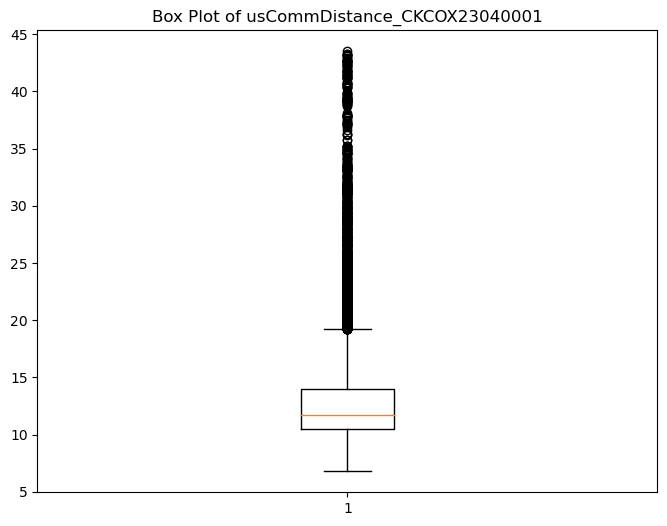

In [5]:
# 박스플롯 생성 (이상치 확인)
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001')
plt.show()

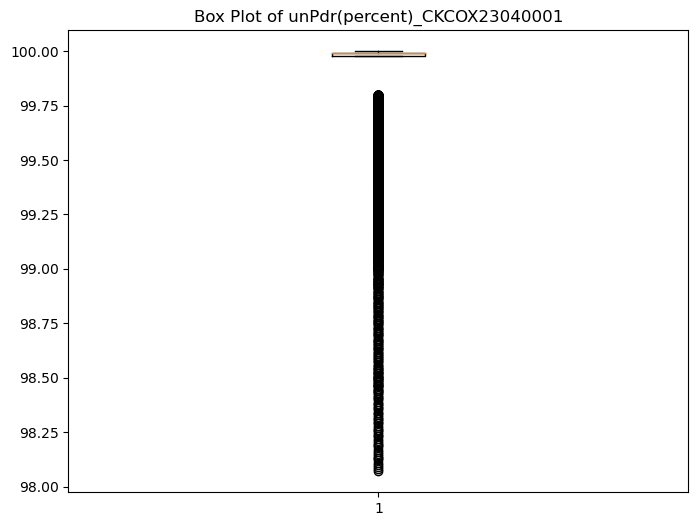

In [6]:
plt.figure(figsize=(8, 6))
plt.boxplot(db1['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040001')
plt.show()

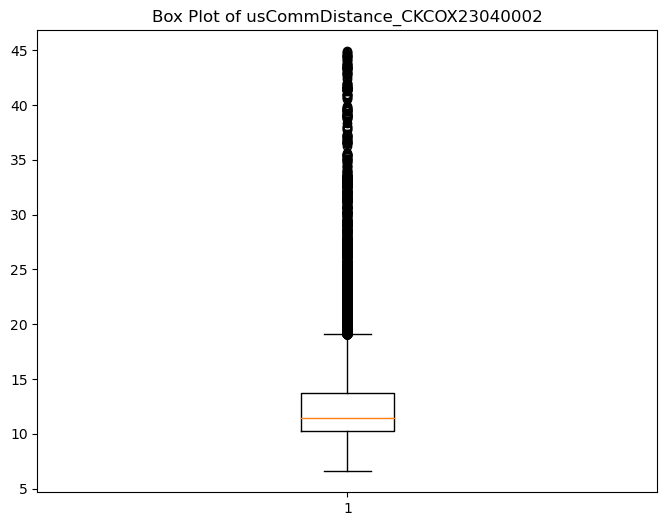

In [7]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002')
plt.show()

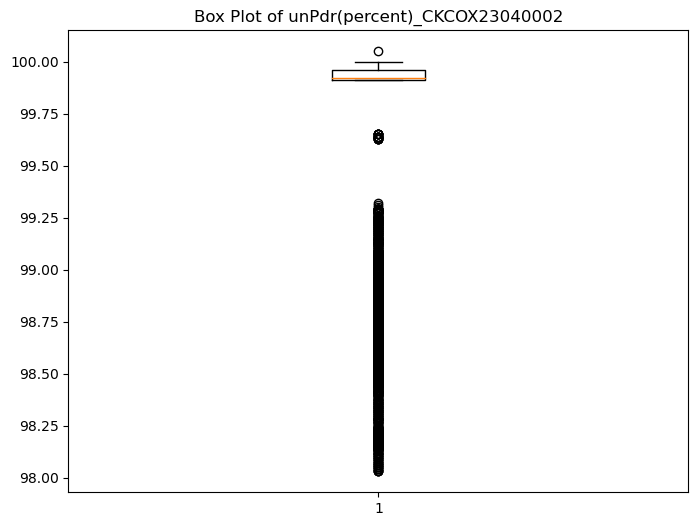

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot(db2['unPdr(percent)'])
plt.title('Box Plot of unPdr(percent)_CKCOX23040002')
plt.show()

대체한 이상치의 수: 355
대체한 이상치의 수: 329


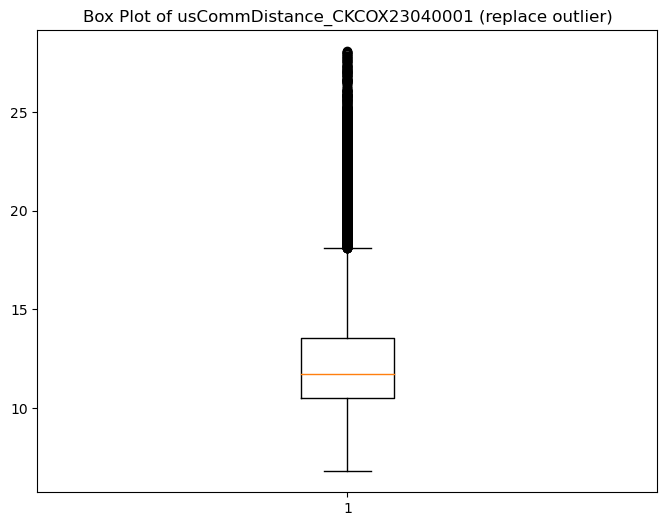

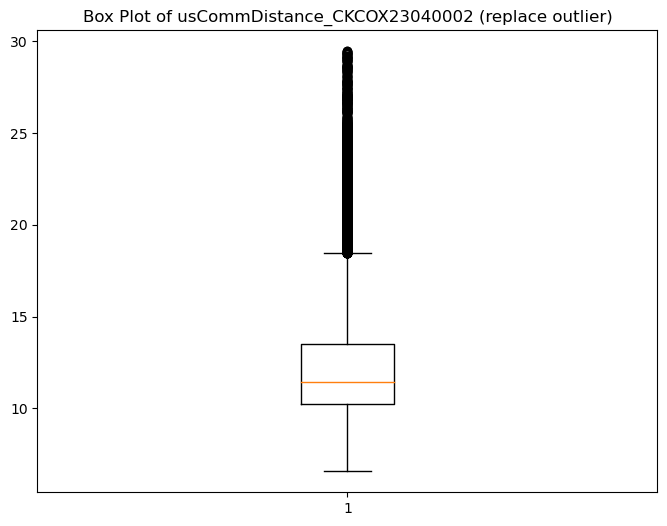

In [9]:
# 이상치 대체 (3표준편차 : 약 99.7%정도)
mean_db1_value = db1['usCommDistance'].mean()
std_db1_dev = db1['usCommDistance'].std()
dev3_db1 = 3 * std_db1_dev
mean_db2_value = db2['usCommDistance'].mean()
std_db2_dev = db2['usCommDistance'].std()
dev3_db2 = 3 * std_db2_dev

# 이상치를 평균값으로 대체하고 대체한 이상치의 수를 계산
outlier_db1_count = sum(abs(db1['usCommDistance'] - mean_db1_value) > dev3_db1)
db1['usCommDistance'] = db1['usCommDistance'].where(abs(db1['usCommDistance'] - mean_db1_value) <= dev3_db1, mean_db1_value)
outlier_db2_count = sum(abs(db2['usCommDistance'] - mean_db2_value) > dev3_db2)
db2['usCommDistance'] = db2['usCommDistance'].where(abs(db2['usCommDistance'] - mean_db2_value) <= dev3_db2, mean_db2_value)

# 대체한 이상치 횟수 출력
print(f"대체한 이상치의 수: {outlier_db1_count}")
print(f"대체한 이상치의 수: {outlier_db2_count}")

# 박스 플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(db1['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040001 (replace outlier)')
plt.show()
plt.figure(figsize=(8, 6))
plt.boxplot(db2['usCommDistance'])
plt.title('Box Plot of usCommDistance_CKCOX23040002 (replace outlier)')
plt.show()

In [10]:
# usCommDistance 오름차순으로 출력
db1.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3461,6.790889,100.00
3462,6.790889,100.00
3459,6.811446,100.00
3458,6.811446,100.00
3455,6.832002,100.00
...,...,...
2868,28.001888,99.75
667,28.021225,99.10
2903,28.041611,99.72
2869,28.063148,99.75


In [11]:
db2.sort_values('usCommDistance')

,usCommDistance,unPdr(percent)
3462,6.578522,99.97
3465,6.599079,99.97
3464,6.599079,99.97
3466,6.599079,99.97
3468,6.619636,99.97
...,...,...
149,29.401590,100.00
2877,29.403061,98.59
148,29.417282,100.00
429,29.443522,99.07


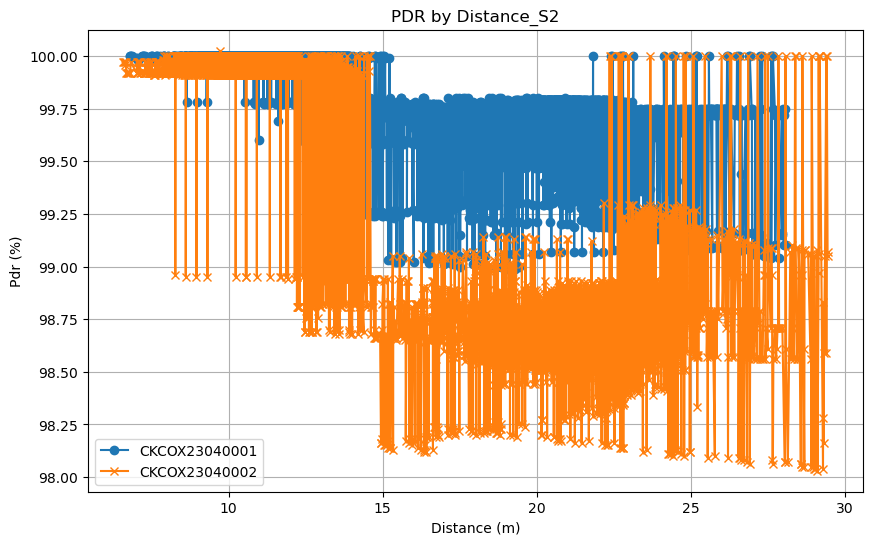

In [12]:
# 데이터 그룹화 및 평균 계산
db1_group = db1.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()
db2_group = db2.groupby('usCommDistance')['unPdr(percent)'].mean().reset_index()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr(percent)'], label='CKCOX23040001', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr(percent)'], label='CKCOX23040002', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Pdr (%)')
plt.title('PDR by Distance_S2')
plt.legend()
plt.grid(True)
plt.show()

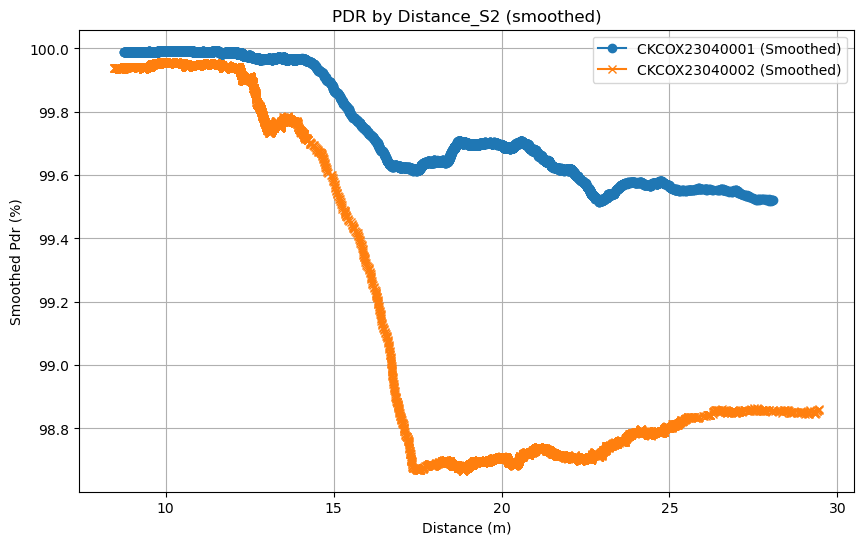

In [15]:
# 이동 평균 계산
window_size = 300
db1_group['unPdr_M'] = db1_group['unPdr(percent)'].rolling(window=window_size).mean()
db2_group['unPdr_M'] = db2_group['unPdr(percent)'].rolling(window=window_size).mean()

# 그래프 그리기 (거리별 PDR)
plt.figure(figsize=(10, 6))
plt.plot(db1_group['usCommDistance'], db1_group['unPdr_M'], label='CKCOX23040001 (Smoothed)', marker='o')
plt.plot(db2_group['usCommDistance'], db2_group['unPdr_M'], label='CKCOX23040002 (Smoothed)', marker='x')
plt.xlabel('Distance (m)')
plt.ylabel('Smoothed Pdr (%)')
plt.title('PDR by Distance_S2 (smoothed)')
plt.legend()
plt.grid(True)
plt.show()